<a href="https://colab.research.google.com/github/CarlosLopes88/02_Machine_learning/blob/main/Randon_forest_Regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Execução do projeto**










* Processo ETL

In [10]:
###     1º Passo 'extract'     ###

#Carregar bibliotecas: vendas

# origem: https://www.kaggle.com/tevecsystems/retail-sales-forecasting

import pandas as pd
import datetime
import time

df = pd.read_csv('https://raw.githubusercontent.com/CarlosLopes88/projeto_prev_vendas/main/mock_kaggle.csv', delimiter=',',decimal='.')

In [11]:
###     2º Passo 'transform'     ###

# Convertendo a coluna data para o formato 'date'

df['data'] = pd.to_datetime(df['data'])

# criando a coluna dia da semana, semana e ano

df['diasemana'] = df['data'].dt.strftime('%w')

df['semana'] = df['data'].dt.strftime('%W')

df['mes'] = df['data'].dt.strftime('%m')

df['ano'] = df['data'].dt.strftime('%Y')

df = df.drop(columns=['data'],axis=1)

df = df.groupby(['diasemana', 'semana','mes', 'ano'], as_index=False).agg({'venda':'sum', 'estoque':'sum','preco':'mean'})

#df = df.loc[df['ano']=='2016']

#dummy_variable_1 = pd.get_dummies(df["diasemana"])

#df = pd.concat([df, dummy_variable_1], axis=1)


df.head()

,diasemana,semana,mes,ano,venda,estoque,preco
0,0,00,01,2014,96,4654,1.29
1,0,00,01,2015,1,2228,1.29
2,0,00,01,2016,0,592,2.29
3,0,01,01,2014,121,5118,1.09
4,0,01,01,2015,96,1837,1.29


* Analise descritiva

In [12]:
df.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


* Gráfico para analise de preço:

Text(0, 0.5, 'preco')

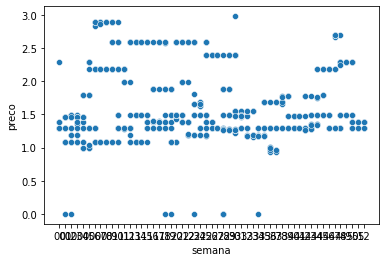

In [13]:
# Importação da biblioteca de visualização
import seaborn as sns

eixo = sns.scatterplot(x=df.semana, y=df.preco)
eixo.set_xlabel('semana')
eixo.set_ylabel('preco')

* Gráfico para analise de vendas:

Text(0, 0.5, 'venda')

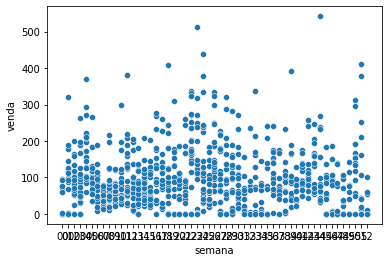

In [14]:
# Importação da biblioteca de visualização
import seaborn as sns

eixo = sns.scatterplot(x=df.semana, y=df.venda)
eixo.set_xlabel('semana')
eixo.set_ylabel('venda')

* Correlação

In [15]:
df.corr()

,venda,estoque,preco
venda,1.000000,0.153659,0.094779
estoque,0.153659,1.000000,-0.032604
preco,0.094779,-0.032604,1.000000


* Separando o Conjunto de Dados em Teste e Treino:

In [16]:
from sklearn.model_selection import train_test_split

X=df.drop(['venda'],axis=1)
y=df['venda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

print("Tamanho do Conjunto de Treino: ",X_train.shape,"| Tamanho do Conjunto de Teste",X_test.shape)
print("Amostra da Tabela de Treino")

Tamanho do Conjunto de Treino:  (702, 6) | Tamanho do Conjunto de Teste (235, 6)
Amostra da Tabela de Treino


* Implementando o modelo de random forest regression

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

ra_fr_re = RandomForestRegressor(random_state=1212, max_depth=20)

ra_fr_re.fit(X_train, y_train)

ra_fr_re.score(X_train, y_train)

0.922575266373328

In [18]:
y_pred_ra_fr_re = ra_fr_re.predict(X_test)

print('MSE = ',mean_squared_error(y_test, y_pred_ra_fr_re), 'R2 = ',r2_score(y_test, y_pred_ra_fr_re))

MSE =  4041.791170597876 R2 =  0.4751240174314638


* Verificação da importancia das variavéis

Feature: 0, Score: 0.13420
Feature: 1, Score: 0.19163
Feature: 2, Score: 0.05530
Feature: 3, Score: 0.09297
Feature: 4, Score: 0.36495
Feature: 5, Score: 0.16096


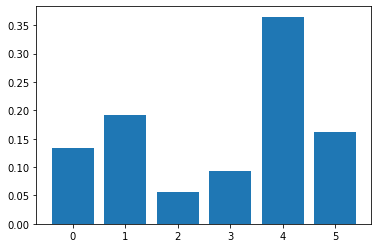

In [19]:
from matplotlib import pyplot

importance = ra_fr_re.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

* Verificação do gráfico da arvore de decisão

* Carregando os dados para a predição:

In [20]:
df_pred = pd.read_csv('https://raw.githubusercontent.com/CarlosLopes88/projeto_prev_vendas/main/mock_kaggle_pred.csv', delimiter=',',decimal='.')

# Convertendo a coluna data para o formato 'date'

df_pred['data'] = pd.to_datetime(df_pred['data'])

# criando a coluna dia da semana, semana e ano

df_pred['diasemana'] = df_pred['data'].dt.strftime('%w')

df_pred['semana'] = df_pred['data'].dt.strftime('%W')

df_pred['mes'] = df_pred['data'].dt.strftime('%m')

df_pred['ano'] = df_pred['data'].dt.strftime('%Y')

df_pred = df_pred.drop(columns=['data'],axis=1)

df_pred = df_pred.groupby(['diasemana', 'semana', 'mes', 'ano'], as_index=False).agg({'venda':'sum', 'estoque':'sum','preco':'mean'})

df_pred.to_dict()

{'ano': {0: '2016',
  1: '2016',
  2: '2016',
  3: '2016',
  4: '2016',
  5: '2016',
  6: '2016',
  7: '2016',
  8: '2016',
  9: '2016',
  10: '2016',
  11: '2016',
  12: '2016',
  13: '2016'},
 'diasemana': {0: '0',
  1: '0',
  2: '1',
  3: '1',
  4: '2',
  5: '2',
  6: '3',
  7: '3',
  8: '4',
  9: '4',
  10: '5',
  11: '5',
  12: '6',
  13: '6'},
 'estoque': {0: 1358,
  1: 1420,
  2: 1359,
  3: 2893,
  4: 1075,
  5: 3179,
  6: 1015,
  7: 3071,
  8: 917,
  9: 4095,
  10: 1550,
  11: 3825,
  12: 1420,
  13: 3642},
 'mes': {0: '08',
  1: '08',
  2: '08',
  3: '08',
  4: '08',
  5: '08',
  6: '08',
  7: '08',
  8: '08',
  9: '08',
  10: '08',
  11: '08',
  12: '08',
  13: '08'},
 'preco': {0: 2.39,
  1: 1.89,
  2: 1.89,
  3: 2.39,
  4: 1.89,
  5: 2.39,
  6: 2.39,
  7: 2.39,
  8: 2.39,
  9: 2.39,
  10: 2.39,
  11: 2.39,
  12: 2.39,
  13: 2.39},
 'semana': {0: '31',
  1: '32',
  2: '31',
  3: '32',
  4: '31',
  5: '32',
  6: '31',
  7: '32',
  8: '31',
  9: '32',
  10: '31',
  11: '32',
 

In [21]:
teste_Carlos = df_pred
pred_Carlos=pd.DataFrame(teste_Carlos,columns=['diasemana', 'semana','mes', 'ano','estoque', 'preco'])
pred_Carlos

,diasemana,semana,mes,ano,estoque,preco
0,0,31,08,2016,1358,2.39
1,0,32,08,2016,1420,1.89
2,1,31,08,2016,1359,1.89
3,1,32,08,2016,2893,2.39
4,2,31,08,2016,1075,1.89
5,2,32,08,2016,3179,2.39
6,3,31,08,2016,1015,2.39
7,3,32,08,2016,3071,2.39
8,4,31,08,2016,917,2.39
9,4,32,08,2016,4095,2.39


In [22]:
print('O valor inserido para o próx período tem o valor predito de:',ra_fr_re.predict(pred_Carlos))

O valor inserido para o próx período tem o valor predito de: [109.31       167.42       152.9        115.744      203.64
 110.08333333 142.95       110.75333333 140.48       168.41
 144.56       160.63       178.         186.02      ]


* Finalizando o processo ETL:

In [23]:
# Unindo os Data Frames df + df_pred

df_pred['venda'] = ra_fr_re.predict(pred_Carlos)

df_dados_vendas = pd.concat([df, df_pred])

df_dados_vendas.to_csv('dados_vendas.csv')